# **Basic Requirements** ⏰⏰⭐⭐⭐⭐⭐

---


- สามารถจำลองเส้นทางการยืมจักรยานได้ (เห็นเป็นวิ่ง ๆ)
- สามารถกำหนดเงื่อนไขในการจำลอง ได้แก่ จำนวนจุดจอดจักรยาน จำนวนจักรยานที่รองรับในแต่ละจุดจอด ช่วงเวลาที่ยืมจักรยาน จุดเริ่มต้นและจุดหมายปลายทางของการยืมจักรยาน
- สามารถแสดงสรุปผลการจำลองในรูปแบบของแดชบอร์ดได้ สรุปในรูปแบบของตัวเลข เวลาที่ใช้ และ ระยะทาง


In [ ]:
!pip install numpy
!pip install matplotlib

In [ ]:
!pip install agentpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install pathfinding

ง่าย
- ทำให้agentแต่ละคนมีstationตัวเองแล้วไปหาstationนั้น
- เอาstepออก แก้เป็นจะรันstepไปเรื่อยๆจนกว่าทุกคนจะไปถึงDestinationของตัวเอง (อันนี้)

ยาก
- ทำให้มีการsimulateสองรอบ รอบแรกใช้A*algorithmที่เคลื่อนที่ไปได้แค่4ทิศทาง กับรอบสองใช้A*algorithmเหมือนเดิมแต่อันนี้สามารถเคลื่อนที่ในแนวทแยงได้

หลังจากได้ยาก
-ทำสรุปเปรียบเทียบ

---
ขอพิมแปป
คือเราไม่สามารถจับเวลาได้ เพราะเราไม่ได้อ้างอิงมาจากแผนที่จริง เป็นการสร้างกริดเท่านั้น

## คุยกับจาร 16/10

-เช้กทั้งสองอย่าง สองแฟคเตอร์ แบบที่เราทำแหละ แต่ไปเขียนโฟลวให้รุ้เรื่องกว่านี้ ✅ (เหลือแก้ FLOW)

-จำนวนจักรยาน ให้เปลี่ยนแบบไดนามิกแต่ละสเต้ป ✅

-คนที่ยังไม่มีจักรยาน ให้คนละสีกับ คนที่มีจักยาน ✅

-ไม่เหมือนกันแต่ละรอบ , เอเจนตืไปต่อ , สร้างขึ้นมาใหม่

-ตอนคืนจักรยานไม่ต้องตรวจสอบ ✅ (ga colony)

-a* algorithm อธิบาย

In [ ]:
import agentpy as ap
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

# 🏝️🍹⛱️🌞 🌊
import time
import random


from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement

# Animation Simulation
from matplotlib.animation import FuncAnimation
import IPython




In [ ]:
class Bicycle(ap.Agent):
# เก็บเอาไว้ก่อน เผื่อในอนาคตจะทำเรื่องรับส่งจักรยานไปแต่ละสถานี เป็นการกระจายจักรยานไปให้สถานีที่จักรยานมันหมด
    def setup(self):
        self.speed = 1
    def move(self):
        x, y = self.model.grid.positions[self]
        next_position = (x + self.speed) % self.model.p.size, y
        if self.model.is_road[next_position]:
            self.model.grid.move_to(self, next_position)

In [ ]:
class Station(ap.Agent):
    def setup(self):
        self.amount_Bicycle = self.model.p.capicity_Station
        name_station = ["LatKra", "Asoke", "Siam", "Phaya"]
        self.name = random.choice(name_station)

In [ ]:
class Person(ap.Agent):
    counter = 1  # เริ่มนับที่ 100

    def setup(self):
        # ค่า Default
        self.speed = 1
        self.path = None
        self.name = f"{Person.counter}"  # ใช้ counter เป็น ID
        Person.counter += 1  # เพิ่ม counter ทุกครั้งที่สร้างตัวแทนใหม่
        self.block_step = 0 # คิดไว้ว่า จะเอาไว้ใช้ว่าสรุปแล้ว Person คนนี้ใช้เวลาเดินทางไปกี่บล็อกบน  grid เพื่อเอาไว้เปรียบเทียบเป็นผลลัพ (ตอนนี้ยังไม่ได้ทำ)
        self.sta_to_des = 0  # บันทึกจำนวน grid node
        self.destination = (np.random.randint(0, self.p.size), np.random.randint(0, self.p.size)) # เป็น tuple (x,y) , random destinationของแต่ละPerson or agent
        self.arrived = False # Falseคือหมายความว่าagentยังไปไม่ถึงDes, TrueคือถึงDesแล้ว
        self.isBike_in_use = False # สถานะว่ากำลังยืมจักรยานอยู่หรือเปล่า ค่าเริ่มต้นคือยัง ถ้าไปถึงสถานีเช่าแล้วได้จักรยานมาถึงเปลี่ยนเป็น True

        # ค่าคำนวณตอน Setup
        self.station_rent_position = None

        # ค่าที่กำหนดที่อื่น
        # self.start : ตำแหน่ง x,y เริ่มต้น

        # ค่าที่คำนวณหลังจาก setup
        self.station_return_position = None






    def find_path_btw_road_and_to_Des(self , agents_Station, size_grid , is_road):
        """⛱ ฟังชันหาเส้นทางการเดินทางไปสถานีที่จะคืนจักรยาน โดยเส้นทางที่ได้ จะต้องอยู่บนถนนเท่านั้น"""
        person_position = self.model.grid.positions[self]

        grid_data = np.ones((size_grid, size_grid))
        grid = Grid(matrix=grid_data)

        # 1. หาก่อนว่า สถานีที่เราจะไปคืนคือสถานีไหน (เป็นสถานีที่ใกล้กับจุดหมายปลายทางของเรา)
        start_x, start_y = person_position
        start_node = grid.node(self.destination[0], self.destination[1])
        finder = AStarFinder()
        best_path_Station_Return_To_Des = None
        shortest_distance = float('inf')

        for station in agents_Station: # วนลูปเพื่อเทียบว่าจาก Station ไปหาถนนที่ใกล้ที่สุดจะมีเส้นทางยังไง
            if station.position != person_position: # ทำเพื่อจะไม่นับ สถานี ณ ตำแหน่งปัจจุบันที่เราอยู่
              des_x, des_y = station.position
              end_node = grid.node(des_x, des_y)
              path, runs = finder.find_path(start_node, end_node, grid)  # start_node  <GridNode(5:7 0x7adbde0ff7c0)>

              # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
              if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
                  shortest_distance = len(path)
                  best_path_Station_Return_To_Des = path

        # ได้ตำแหน่งของสถานีที่เราจะไปคืนจักรยานได้
        self.station_return_position = (best_path_Station_Return_To_Des[-1].x , best_path_Station_Return_To_Des[-1].y)
        best_path_Station_Return_To_Des.reverse() # ได้เส้นทางจาก สถานีที่จะคืนจักรยาน to จุดหมายปลายทาง

        # 2. หาเส้นทางจาก สถานีที่เรามายืมจักรยาน ไปยัง สถานีที่เราจะไปคืนจักรยาน
        grid_data_Obstacles = Grid(matrix=np.where(is_road, 1, 5))
        finder = AStarFinder()
        x, y = self.station_rent_position
        start = grid_data_Obstacles.node(x , y)
        end = grid_data_Obstacles.node(self.station_return_position[0], self.station_return_position[1])
        road_path, runs = finder.find_path(start, end, grid_data_Obstacles)

        if road_path is not None:
          road_path.pop(0)  # ลบindexแรกออก เพราะมันคือตำแหน่งที่เรายืนอยู่ ณ ปัจจุบัน ซึ่งเราเดินมาแล้ว

        if best_path_Station_Return_To_Des is not None:
          best_path_Station_Return_To_Des.pop(0) # ลบindexแรกออก เพราะถ้าไม่ลบตอนบวก list เข้ากับ road_path จะมีตำแหน่งที่ซ้ำกับindexสุดท้ายของ road_path

        self.path = road_path + best_path_Station_Return_To_Des




    # การกำหนดเส้นทางของ Person ตั้งแต่ตอนที่นางเกิด
    def find_path_to_station(self , agents_Station, size_grid):
        """⛏ เป็นฟังชันเริ่มต้นจะถูกใช้ตอน set up Person ตั้งแต่ต้น , ไว้หาเส้นทางจาก จุดเริ่มต้น --> station ที่ใกล้ที่สุด"""
        # ฟังชันนี้คือหาเส้นทางจาก จุดเริ่มต้น --> station ที่ใกล้ที่สุด เพื่อที่พอถึง station จะได้เข้าเงื่อนไขใน step แล้วจะคำนวณหา (เส้นทางระหว่างถนนเพื่อไปสถานีที่จะคืนจักรยาน)+(เส้นทางจากสถานีที่จะคืนไปยังDes)
        person_position = self.model.grid.positions[self]

        grid_data = np.ones((size_grid, size_grid))
        grid = Grid(matrix=grid_data)

        # ตำแหน่งเริ่มต้น
        start_x, start_y = person_position # เป็นตัวเลข (x, y) ของ station เพราะฟังชันนี้จะคำนวณเส้นทางหลังจากมาถึง Station ไป Destination
        start_node = grid.node(start_x, start_y)

        # คำนวณ A* สำหรับทุกจุดปลายทาง
        finder = AStarFinder()
        best_path_to_Station_Rent = None
        shortest_distance = float('inf') # ค่าเป็นอนันต์ (infinity)

        for station in agents_Station: # วนลูปเพื่อเทียบว่าจาก Station ไปหาถนนที่ใกล้ที่สุดจะมีเส้นทางยังไง
            if station.amount_Bicycle > 0 and station.position != person_position:
              des_x, des_y = station.position
              end_node = grid.node(des_x, des_y)
              path, runs = finder.find_path(start_node, end_node, grid)  # start_node  <GridNode(5:7 0x7adbde0ff7c0)>

              # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
              if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
                  shortest_distance = len(path)
                  best_path_to_Station_Rent = path

        if best_path_to_Station_Rent is not None:
            best_path_to_Station_Rent.pop(0)
        self.station_rent_position = (best_path_to_Station_Rent[-1].x , best_path_to_Station_Rent[-1].y)
        self.path = best_path_to_Station_Rent


    def move(self):
        if self.path and len(self.path) > 0:
            # ย้ายไปยังตำแหน่งต่อไปในเส้นทาง
            next_position = self.path.pop(0)  # ดึงจุดถัดไปจากเส้นทาง
            # x, y = self.model.grid.positions[self]
            self.model.grid.move_to(self, next_position)

In [ ]:

class TrafficModel(ap.Model):
    def setup(self):

        self.all_arrived = int(self.p.agents_Person) # ค่าตั้งต้นคือจำนวน agent ทั้งหมดซึ่งเป็นค่าตัวเลข int --> ถ้าเกิด agent ไปถึง Destination จะมาทำการลบค่าตรงนี้ -1 ซึ่งไว้ใช้เช็กว่า ทุก agent ถึง Destination ของตัวเองแล้วหรือยัง ถ้าถึงแล้วค่าตรงนี้จะเหลือ 0

        self.grid = ap.Grid(self, [self.p.size, self.p.size], track_empty=True)

        # Create Person
        self.agents_Person = ap.AgentList(self, self.p.agents_Person, Person)

        # Create Bicycle
        self.agents_Bicycle = ap.AgentList(self, self.p.agents_Bicycle, Bicycle)

        # สุ่มตำแหน่งคน แล้ว add บน Grid
        num_person_samples = self.p.agents_Person # จำนวนคนที่ต้องการสุ่ม
        positions_person = [(np.random.randint(0, self.p.size), np.random.randint(0, self.p.size)) for _ in range(num_person_samples)]
        self.grid.add_agents(self.agents_Person, positions_person)
        for i, person in enumerate(self.agents_Person):
            person.start = positions_person[i]


        # Set Road Route
        line_road = self.p.size // 2
        road_positions = [(x, line_road) for x in range(self.p.size)] + [(line_road, y) for y in range(self.p.size)]

        # Set จุดจักรยาน ที่เป็นการสุ่มบนถนน Road_Position
        self.positions_bicycle = self.random.sample(road_positions, k=len(self.agents_Bicycle))
        print("start_positions", self.positions_bicycle) # เช่น [(19, 10)]
        self.grid.add_agents(self.agents_Bicycle, self.positions_bicycle)



        self.is_road = np.zeros((self.p.size, self.p.size), dtype=bool)
        self.is_road[:, line_road] = True # เลือกคอลัมน์ที่เป็นแนวตั้งทั้งหมด (:) สำหรับแถวที่เป็น road_y ซึ่งเป็นตำแหน่งของถนนที่คุณต้องการให้จักรยานเคลื่อนที่
        self.is_road[line_road, :] = True
        # จะได้ is_road ประมาณนี้ array([[False, False, False, False, True, False, False, False]]) กรณีsize 8*8
        self.is_road[13][5] = True
        self.is_road[14][5] = True


        # ตำแหน่ง Fix Station Location 🚩🏳️‍🌈 --> ต้องไม่อยู่ทับถนน ถ้าอยู่ทับแล้วจะเกิด Error ชื่อ AttributeError: 'NoneType' object has no attribute 'pop'
        # self.station_locations = [(3,9), (6,11), (9,6), (9,18), (11,2), (11,8), (11,12), (11,16), (14, 11), (17,9)]
        self.station_locations = [(3,9), (6,11), (9,6), (9,18), (11,2), (11,8),]

        # 🚀🚀 สร้างตำแหน่ง station แล้ว add บน Grid
        num_station = len(self.station_locations)
        self.agents_Station = ap.AgentList(self, num_station, Station)
        self.grid.add_agents(self.agents_Station, self.station_locations)

        for i, station in enumerate(self.agents_Station):
            # station.setup(self.station_locations[i])
            station.position = self.station_locations[i]
            # print(f"i : {i}   station : {station.name} /// {station}  ---> {station.position}")

        # ให้แต่ละ person หาสถานีที่ใกล้ที่สุด
        for person in self.agents_Person:
            person.find_path_to_station(self.agents_Station, self.p.size)
            person.block_step += len(person.path)

    def step(self):
        for agent in self.agents_Person: # แก้ไขตรงนี้
            agent_position = self.model.grid.positions[agent]

            if (agent.arrived == True): # บรรทัดนี้มาเพื่อแก้ ปัญหาที่ว่าแม้agentจะไปDesแล้ว มันก็จะคำนวณซ้ำๆต่อไปทั้งที่ไม่มีความจำเป็นต้องคำนวณagentที่ถึงจุดหมายแล้ว จึงใช้ continueเพื่อข้ามไปตัวอื่นเลย
                continue

            # เมื่อเดินทางมาถึงสถานี
            elif (len(agent.path) == 1) and (agent.path[-1].x , agent.path[-1].y) == agent.station_rent_position:
              # คิด self.path ต่อ
              # 1. ก่อนจะเข้าสถานี หนึ่งก้าว (ถ้าหลัง agent.move ด้านล่างคือเข้าเรียบร้อย)
              # 2. เดินมาถึงสถานีเรียบร้อย
              agent.move()

              # 3. หลังจากมาถึงสถานี agent จะรู้ว่าสรุปแล้วมีจักรยานเหลือไหม
              for each_station in self.agents_Station:
                if each_station.position == agent.station_rent_position:
                    if each_station.amount_Bicycle > 0: # ลบจำนวนจักรยานออก
                      each_station.amount_Bicycle -= 1
                      print(f"{each_station.name} เหลือเท่าไหร่ : {each_station.amount_Bicycle} คนที่มายืมคือ : {agent.name}")
                      agent.isBike_in_use = True # ยืมจักรยานมาแล้วก็เปลี่ยนค่าเป็นกำลังใช้จักรยานอยู่
                      # 4. ค้นหาเส้นทางไปยัง Destination
                      agent.find_path_btw_road_and_to_Des(self.agents_Station, self.p.size, self.is_road)
                      agent.block_step += len(agent.path)

                    else: # กรณีจักรยานหมด จะคิดเส้นทางไปstationใกล้เคียงกับตำแหน่งที่เราอยู่ ณ ตอนนี้
                      agent.find_path_to_station(self.agents_Station, self.p.size) # ไม่ส่งตำแหน่ง ณ ปัจจุบันไป เพราะในฟังชัน มีการหาค่าที่agentอยู่ ณ ตอนนี้อยู่แล้ว
                      agent.block_step += len(agent.path)

            # 5. เงื่อนไข ถ้ามาถึงสถานีที่จะคืนจักรยาน จะบวกจำนวนจักรยานในสถานี้นั้นออก
            elif agent_position == agent.station_return_position:
              for each_station in self.agents_Station:
                if each_station.position == agent.station_return_position:
                    each_station.amount_Bicycle += 1
                    agent.isBike_in_use = False
                    agent.move()
            # จะเข้า else ถ้ายังมี self.path ให้คนเดิน, ส่วนพวกif elif ด้านบนคือ นางต้องคำนวณเส้นทางก่อน ถึงจะมี self.path มาให้เดินตาม
            else:
              agent.move()


            if (len(agent.path) == 0) and agent.destination == agent_position:
              self.all_arrived -= 1
              agent.arrived = True # บอกว่า agent ตัวนี้เดินทางเสร็จแล้ว

        if self.all_arrived == 0:
          print(f"เข้าหมดทุกตัวแล้วฮะ 💵💵 จำนวน step การเดินทั้งหมดก็คือ คือ คือ --> {self.t}")
          self.stop()
          self.report()

        if self.t == self.p.steps:
          self.stop()
          self.report()



    # สรุปผลการเดินทางของแต่ละคน
    def report(self, key=None, value=None): # Add key and value arguments กัน error เฉยๆ
        if key == 'seed':
            return # Exit the method

        for agent in self.agents_Person:
            start_y, start_x = agent.start
            station_y, station_x = agent.station_rent_position
            dest_station_y, dest_station_x = agent.station_return_position
            des_y, des_x = agent.destination
            print(f"Person {agent.name}:"
              f"\n\tจุดเกิด ({start_y}, {start_x})" # อย่าลืมสลับ x กับ y เพราะมันอยู่คนละแกนกันตอนที่วาดออก
              f"\n\tDestination ({des_y}, {des_x})"
              f"\n\tตำแหน่งสถานีที่ไปยืมจักรยาน ({station_y}, {station_x})"
              f"\n\tตำแหน่งสถานีที่ไปคืนจักรยาน: ({dest_station_y}, {dest_station_x})"
              f"\n\tระยะทางทั้งหมด {agent.block_step} block steps")


    def update(self):
        # update แต่ละ step เพื่อใช้ในฟังชัน animation_plot

        return self.is_road, self.station_locations, self.agents_Station , self.agents_Person

    # def end(self):
    #     return self.all_arrived or self.t >= self.p.max_steps


In [ ]:
!pip install ipywidgets

import ipywidgets as widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


In [ ]:

def animation_plot(model, ax):
    """
        Updates and plots the simulation state.

        Args:
            frame (int): The current frame number of the animation.
            model (TrafficModel): The simulation model instance.
            ax (matplotlib.axes.Axes): The axes object to plot on.
    """

    road, stations, agents_Station, agents_Person = model.update() # เป็นการเรียกให้โมเดลอัปเดตสถานะใหม่ในแต่ละ time-step โดยคืนค่าออกมาเป็นสองสิ่ง:
    # road: ข้อมูลเกี่ยวกับถนน เช่น แผนที่ถนนในรูปแบบของ array ที่มีค่าเป็น 0 หรือ 1 (binary) เพื่อแสดงส่วนของถนนและพื้นที่อื่น ๆ
    # positions: ตำแหน่งของจักรยานในโมเดลซึ่งเก็บในรูปแบบ dictionary ที่บอกตำแหน่ง (y, x) ของแต่ละจักรยาน --> การเข้าถึงค่าในอาเรย์สองมิติ โดยปกติจะเรียกผ่านการระบุ (row, column) ซึ่งเทียบได้กับ (y, x) นั่นเอง

    # Plot road
    ax.imshow(road, cmap='binary') # ใช้ ax.imshow() ในการวาดแผนที่ถนน (road) ลงบนแกน ax โดยใช้โหมดสี (colormap) แบบ binary เพื่อแสดงถนนเป็นโทนสีขาวดำ (0 เป็นสีหนึ่งและ 1 เป็นอีกสีหนึ่ง)

    # xticks คือเส้นขีดเล็ก ๆ ที่ปรากฏบนแกน x อะ
    ax.set_xticks(np.arange(-0.5, model.p.size, 1), minor=True)  # ตั้งค่าตำแหน่งเส้นกริดแนวนอน , ตั้งค่าตำแหน่งของ tick marks เพื่อให้แสดงที่ -0.5, 0.5, 1.5, ..., 19.5 ช่วยให้เส้นกริดอยู่กลางระหว่างช่องในกระดานหมากรุก เพื่อให้ผู้ใช้เห็นว่าแต่ละช่องแบ่งออกเป็นอย่างไร
    ax.set_yticks(np.arange(-0.5, model.p.size, 1), minor=True)  # ตั้งค่าตำแหน่งเส้นกริดแนวตั้ง

    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)  # วาดเส้นกริดสีดำ
    ax.tick_params(which='minor', size=0)  # ซ่อน tick-mark

    # แสดงตัวเลขตามขนาด (size)
    ax.set_xticks(np.arange(model.p.size))  # กำหนดตำแหน่งตัวเลขแกน X
    ax.set_yticks(np.arange(model.p.size))  # กำหนดตำแหน่งตัวเลขแกน Y
    ax.set_xticklabels(np.arange(model.p.size))  # กำหนดตัวเลขที่แสดงบนแกน X
    ax.set_yticklabels(np.arange(model.p.size))  # กำหนดตัวเลขที่แสดงบนแกน Y

    SIZE_CIRCLE_DRAW = 40 # ขนาดจุดที่จะวาด

    # Plot bicycles
    positions_bicycle = {k: v for k, v in model.grid.positions.items() if isinstance(k, Bicycle)}
    # model.grid.positions คือ dictionary ที่เก็บตำแหน่งของตัวแทน (agents) ในโมเดล โดยแต่ละตัวแทน (agent) จะถูกใช้เป็น key และตำแหน่งของมัน (เป็น tuple (x, y)) จะเป็น value
    # ==> ส่วน items() จะส่งกลับรายการของ key-value pairs ใน dictionary ซึ่งในที่นี้จะเป็นรายการของตัวแทน (agents) และตำแหน่งของพวกเขา.
    # k = แทนตัวแทน (agent) เช่น Bicycle หรือ Person , v = แทนตำแหน่งของตัวแทน (agent) ในรูปแบบ (x, y)
    if positions_bicycle: # ตรวจสอบว่ามีข้อมูลตำแหน่งของจักรยานหรือไม่ หากมีจักรยานใน simulation จะเข้าสู่ขั้นตอนต่อไป
        y, x = zip(*positions_bicycle.values()) # ตำแหน่งของจักรยานที่ได้จาก positions.values() จะถูกแยกออกเป็นพิกัด y และ x ด้วยการใช้ฟังก์ชัน zip() เพื่อเตรียมพิกัดสำหรับการ plot จุด
        ax.scatter(x, y, c='red', s=SIZE_CIRCLE_DRAW) # วาดตำแหน่งจักรยานลงบนแผนที่โดยใช้ ax.scatter() ซึ่งจะ plot จุดที่ตำแหน่ง (x, y) , ใช้สีแดง (c='red') เพื่อแทนจักรยาน และกำหนดขนาดของจุด (s=50)

    # Plot persons
    positions_person = {k: v for k, v in model.grid.positions.items() if isinstance(k, Person)}  # ดึงตำแหน่งของบุคคล
    # positions_person จะเป็น dictionary ใหม่ที่เก็บเฉพาะตำแหน่งของตัวแทนที่เป็นประเภท Person เช่น {Person1: (x1, y1), Person2: (x2, y2),...}
    if positions_person:  # ตรวจสอบว่ามีตำแหน่งของบุคคลหรือไม่
        y_person, x_person = zip(*positions_person.values())  # แยกพิกัด y และ x

        # เพิ่มชื่อให้กับแต่ละคน
        for person, (x, y) in zip(positions_person.keys(), zip(x_person, y_person)):
          # print(f"person 🚼🚼 : {person.name} --> status {person.isBike_in_use}")

          # Plot Destination แต่ละ Person
          des_y, des_x = person.destination
          ax.scatter(des_x, des_y, c='grey', s=SIZE_CIRCLE_DRAW)
          ax.text(des_x, des_y, f"Des-{person.name}", fontsize=10, ha='right')




    # Plot Person
    for agent in agents_Person:
        ax.text(x, y, f"P-{agent.name}", fontsize=10, ha='right')
        agent_position = model.grid.positions[agent]
        # color_person = 'yellow' if person.isBike_in_use == True else 'blue'
        ax.scatter(agent_position[1], agent_position[0], c='yellow' if agent.isBike_in_use == True else 'blue', s=SIZE_CIRCLE_DRAW)  # วาดตำแหน่งบุคคลด้วยสีฟ้า


    # ✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
    positions_station = {k: v for k, v in model.grid.positions.items() if isinstance(k, Station)}  # ดึงตำแหน่งสถานี
    if positions_station:  # ตรวจสอบว่ามีตำแหน่งของบุคคลหรือไม่
        y_station, x_station = zip(*positions_station.values())  # แยกพิกัด y และ x
        ax.scatter(x_station, y_station, c='green', s=SIZE_CIRCLE_DRAW)
        # เพิ่มชื่อให้กับแต่ละสถานี
        for station, (x, y) in zip(positions_station.keys(), zip(x_station, y_station)):
          ax.text(x, y, f"{station.name} {station.amount_Bicycle}", fontsize=10)


    ax.set_title(f"Traffic Simulation\n"
                  f"Time-step: {model.t}")

def run_model(max_steps):
    parameters = {
        'steps': max_steps,
        'agents_Bicycle':  1, # มีไว้เพื่อ test การเดินไปบนกริดทีละ step เฉยๆ แต่ในอนาคตอาจจะนำมาปรับปรุงเพิ่ม เพื่อทำการขนส่งจักรยานไปแต่ละ Station
        'agents_Person': 1,
        'size': 20, # ตำแหน่งขนาดกว้างxสูงของกริด
        'capicity_Station': 2, # ค่า capacity เริ่มต้น
    }
    fig, ax = plt.subplots(figsize=(7, 7)) #  ขนาดของรูป (figure) ถูกตั้งไว้ที่ _x_ นิ้ว , fig เป็นตัวแทนของรูปทั้งหมดที่สร้างขึ้น , ax เป็นแกน (axis) ที่จะใช้ในการวาดแผนภาพบนรูปนั้น
    start_time = time.time() # เริ่มจับเวลา
    model = TrafficModel(parameters)

    # สำหรับ ax1
    animation = ap.animate(model, fig, ax, animation_plot) # ฟังก์ชัน animate จากไลบรารี AgentPy จะสร้างแอนิเมชันสำหรับการจำลองโมเดล TrafficModel , animation_plot อาจจะเป็นฟังก์ชันที่กำหนดวิธีการแสดงผลการจำลองแต่ละเฟรม

    # animation = FuncAnimation(
    #     fig, animation_plot, fargs=(model, ax),
    #     interval=2, repeat=True
    # )



    end_time = time.time() # จับเวลาหลังจาก simulation เสร็จสิ้น
    # จับเวลา
    print(f"Simulation time: 🛕🛕🛕🛕 {((end_time - start_time) * 1000):.2f} ms")


    # return IPython.display.HTML(animation.to_jshtml())
    return IPython.display.HTML(animation.to_jshtml(fps=10))


# Create an input box for max_steps
max_steps_input = widgets.IntText(
    value=40,
    description='Max Steps:',
    disabled=False
)

# Button to start the simulation
start_button = widgets.Button(description="Run Simulation")

# Function to run simulation when button is clicked
def on_button_clicked(b):
    display(run_model(max_steps_input.value))

# Link button click to simulation function
start_button.on_click(on_button_clicked)

# Display the input box and button
display(max_steps_input, start_button)

# Run the model and display the animation
# run_model(40) # max สูงสุดคือ100 แต่มันจะหยุดก่อนหน้าได้ ถ้าเกิดทุก agent เข้า des ไปหมดแล้ว ,มันไม่สามารถกำหนด infinity ได้ เพราะมันบังคับให้ใส่ int เข้าไป

IntText(value=40, description='Max Steps:')

Button(description='Run Simulation', style=ButtonStyle())

start_positions [(10, 12)]
Simulation time: 🛕🛕🛕🛕 194.01 ms
Siam เหลือเท่าไหร่ : 1 คนที่มายืมคือ : 4
เข้าหมดทุกตัวแล้วฮะ 💵💵 จำนวน step การเดินทั้งหมดก็คือ คือ คือ --> 25
Person 4:
	จุดเกิด (0, 10)
	Destination (11, 19)
	ตำแหน่งสถานีที่ไปยืมจักรยาน (3, 9)
	ตำแหน่งสถานีที่ไปคืนจักรยาน: (9, 18)
	ระยะทางทั้งหมด 24 block steps


# ปล. ที่เขียนในโคแลปเป็นภาษาห้วน เพราะเขียนทดเอง+ไว้คุยกับเพื่อนค่ะ จารรรรร!! TT

> ## Question ❓


1. ถึง Destination แล้วทำไงต่อ ไม่ต้องกลับไปคืนจักรยานที่สถานีเหรอ?

= ในขั้นแรก ไปถึง destination ได้แล้วเนอะ ทำจำนวนมากกว่า 1 agent ก่อนขั้นต่อไป ทำให้กลับได้ แต่ทำเป็นรอบๆไป


2. สถานีมันควรอยู่ติดถนนหรือเปล่า? เพราะยังไงมันก็เป็นสิ่งที่ต้อง FIX ด้วยมือเองอยู่แล้ว เลยสงสัยว่ามันน่าจะอยู่ติดถนนไหม (เห็นด้วยให้ สถานี อยู่ติดถนนครับ)

= เห็นด้วยให้ สถานี อยู่ติดถนนครับ

### คำถามใหม่ ೀ 🛺 ‧ ˚ 🇹🇭 ⊹˚. ♡ 🌈


3. Agent เกิดบนถนนได้ไหม?

= ...

4. agent ทุกคนสามารถไป station ได้แล้ว ทีนี้ให้ขี่ไป destination เลย (ตอนนี้เป็นอย่างนี้) หรือต้องให้คืนจักรยานที่ station ที่ใกล้ destination ที่สุดด้วยก่อน🤔

= ...

```
Task ที่จะทำ 🚀
```
---


✅ คิดคำนวณหาทางไปยังถนน หลังจากไปสถานีแล้ว เพื่อเดินทางไปยัง Des
Question : สถานีมันควรอยู่ติดถนนหรือเปล่า? ยังไงมันก็ต้อง FIX ไว้อยู่แล้ว มันไม่น่าจะใช้การสุ่ม

✅ ใช้เส้นทางบนถนน เพื่อไปยัง Des

🔜 เอาstepออก แก้เป็นจะรันstepไปเรื่อยๆจนกว่าทุกคนจะไปถึงDestinationของตัวเอง (ต้องกลับมาแก้ใหม่อีกรอบ)

✅ ทำให้agentแต่ละคนมีstationตัวเองแล้วไปหาstationนั้น

✅ ทำให้agentไปคืนจักรยานที่สถานีที่ใกล้ที่สุด

- ทำให้ทิศทางมันไม่ใช่แค่ขึ้นลงซ้ายขวาแต่เฉียงได้

🔜 กำหนดเงื่อนไขให้สถานี --> เงื่อนไข: จำนวนจักรยานที่มี

- กำหนดเงื่อนไขให้ Person --> ถ้าจักรยานหมด Person จะไปสถานีอื่นแทน

- แสดงผลลัพธ์ในรูปแบบแดชบอร์ด (ต้องทำเพราะอยู่ในขอบเขตของโครงงาน)




## GOAL วันที่ 25 กันยายน
- สร้าง agent สุ่มเกิดตรงไหนก็ได้ในแมพ ไม่จำเป็นต้องเป็นถนน แล้วให้ agent เดินไปที่สถานี (แบบสุ่ม) แล้วให้ออกจากสถานีไป destination อีกที (destination สุ่ม)
- ถ้าได้แล้วค่อยทำให้มีอย่างละ 3
- reinforcement คร่าวๆ ว่าพอ apply อะไรกับเราได้ ดูแบบ simple ก่อน เป็นพวกการตัดสินใจว่าจะไปทางไหนงี้
หรือ perceive หรือถ้ามีอย่างอื่นที่น่าสนก็ใช้ก้ได้
- เดินไปสถานีแบบสุ่ม แล้วไปเดสโดยใช้ถนน


## คิดว่า des ไม่น่าใช่ agent น่าจะเป็นแค่จุดหนึ่งที่ให้ person ไปมากกว่า

- สีเทา = Destination
- สีเขียว = Station
- สีแดง = Bicycle
- สีน้ำเงิน = Person

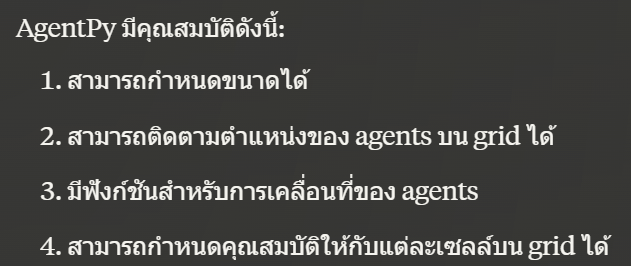

เราจะลองใช้ วิธีที่สองก่อน

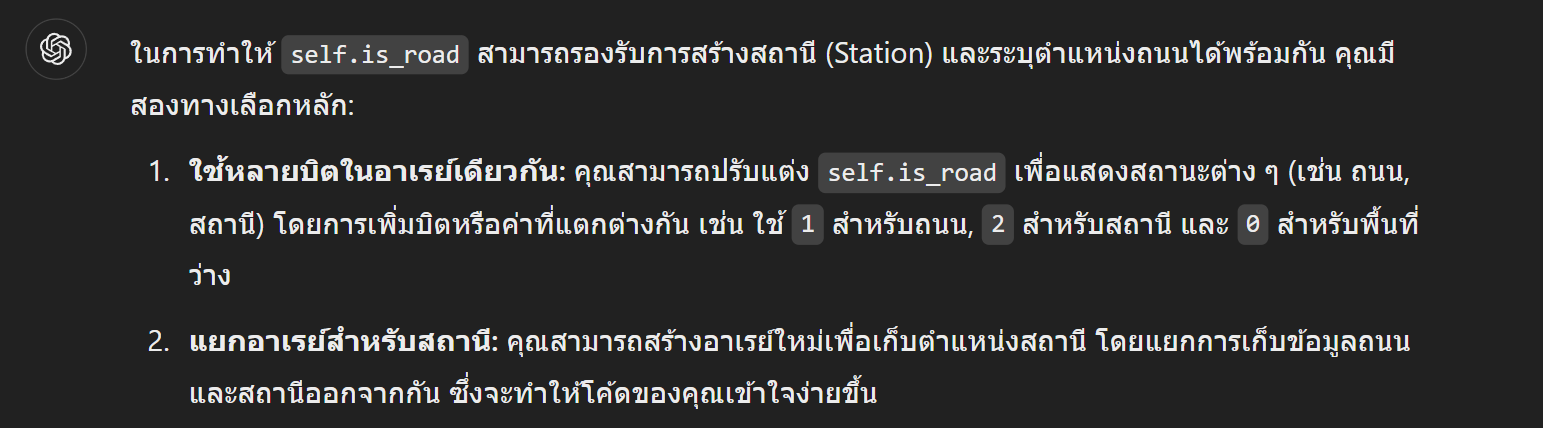

- สามารถนำไปปรับปรุงได้
1. การจัดการ Path ที่ไม่มีค่า
ตรวจสอบว่า self.path ไม่เป็น None ก่อนการเรียก self.path.pop(0) เพื่อป้องกันข้อผิดพลาดในการดึงตำแหน่งถัดไปจากเส้นทาง

## Case ไว้เข้าเงื่อนไข ⚠️
1. กรณีที่จุดปลายทางอยู่บน Des ควรทำไง หรือควรกำหนดไว้ว่าจุดปลายทางไม่ควรอยู่บนถนน?

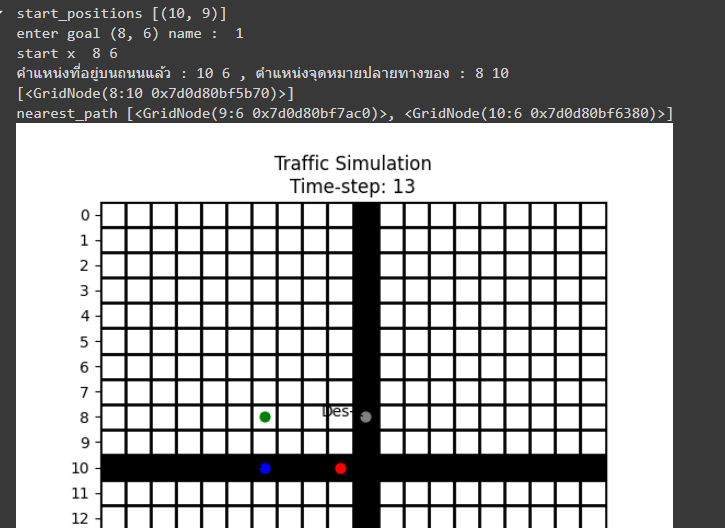

## Ref น่าสนใจ
1.https://github.com/msdundar/notes-algorithms
- A brief summary of various algorithms. Each algorithm provides examples written in Python, Ruby and GoLang.



In [ ]:






def find_nearest_path(start_position, road_data , is_road, size_grid, destination_agent):

    # grid_data_Obstacles = np.where(is_road, 1, 0) # คือตอนแรกเราทำแบบนี้ แต่การกำหนดให้ 1 เป็น road แล้ว 0 เป็นสิ่งกีดขวาง มันทำให้ค่า path เป็น None เนื่องจาก ไม่สามารถวิ่งผ่านสิ่งกีดขวาง (Obstacles) บนกริด ได้
    grid_data = np.ones((size_grid, size_grid))
    grid = Grid(matrix=grid_data)

    # ตำแหน่งเริ่มต้น
    start_x, start_y = start_position # เป็นตัวเลข (x, y) ของ station เพราะฟังชันนี้จะคำนวณเส้นทางหลังจากมาถึง Station ไป Destination
    start_node = grid.node(start_x, start_y)

    # คำนวณ A* สำหรับทุกจุดปลายทาง
    finder = AStarFinder()
    best_path_near_Station = None
    shortest_distance = float('inf') # ค่าเป็นอนันต์ (infinity)

    for road_positions in road_data: # วนลูปเพื่อเทียบว่าจาก Station ไปหาถนนที่ใกล้ที่สุดจะมีเส้นทางยังไง
        # print(road_positions) # (0, 10) (1, 10), ... มันคือตำแหน่งกริดสีดำที่เป็นถนน ซึ่งเป็นตำแหน่งใน road_data ที่เป็นลิส
        des_x, des_y = road_positions
        end_node = grid.node(des_x, des_y)
        path, runs = finder.find_path(start_node, end_node, grid)  # start_node  <GridNode(5:7 0x7adbde0ff7c0)>
        # print(len(path)) # 0
        # print(path) # []

        # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
        if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
            shortest_distance = len(path)
            best_path_near_Station = path

    if best_path_near_Station is not None:
        best_path_near_Station.pop(0)

    # Set Variable
    x, y = best_path_near_Station[-1].x, best_path_near_Station[-1].y # (x , y) คือตำแหน่งหลังจากออก Station มาอยู่บนถนน
    des_x_agent, des_y_agent = destination_agent
    # print(f"คำแหน่งที่อยู่บนถนนแล้ว : {x} {y} , ตำแหน่งจุดหมายปลายทางของ Person : {des_x_agent} {des_y_agent}") # 10 6


    # print("---------------------")
    # หลังจากมาถึงสถานีแล้ว Person จะเดินทางไปหาถนนที่ติดกับสถานี จึงเริ่มคำนวณหาวิธีให้ Person ไปยัง Des โดยที่เส้นทางที่มาจะต้องอยู่บนถนน แล้วหลังจากนั้นให้เดินเส้นทางปกติต่อ กรณีที่ Des ไม่อยู่บนถนน ซึ่งจะมี 2 ขั้นตอน
    # 1. คำนวณตำแหน่ง best_path ที่ Des อยู่ติดกับถนนก่อน (Des = start , road = End)
    best_path_near_Des = None
    shortest_distance = float('inf')
    start_node = grid.node(des_x_agent, des_y_agent)
    for destination in road_data:
        des_x, des_y = destination
        end_node = grid.node(des_x, des_y)
        path, runs = finder.find_path(start_node, end_node, grid)

        # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
        if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
            shortest_distance = len(path)
            best_path_near_Des = path
    best_path_near_Des.reverse() # reverse จากที่จุดเริ่มคือ Des ให้จุด Des กลับไปเป็นปลายทาง
    # print(f"1. ตำแหน่งถนนที่ agent จะปั่นจักรยานมา {best_path_near_Des[0].x} {best_path_near_Des[0].y}")


    # print("---------------------")
    # 2. คำนวณเส้นทางจากตำแหน่งเริ่มต้นบนถนน (ที่อยู่ใกล้กับ Station) ไปยังตำแหน่งบนถนนที่อยู่ติดกับจุดหมาย (Des) -->  (อันนี้ส่งไปคำนวณที่อื่นด้วย return เนื่องจากเหมือนจะนับจุดเริ่มต้นกับจุดendNodeเป็นของก่อนหน้า เลยแก้ด้วยการส่งไปไว้ที่อื่นเพื่อคำนวณแทน)
    x_start_coordinate_second , y_start_coordinate_second = best_path_near_Station[-1].x , best_path_near_Station[-1].y
    end_node_second = grid.node(best_path_near_Des[0].x, best_path_near_Des[0].y)

    # Check Mistake
    if start_node == end_node:
      print("🚧 ตำแหน่งเริ่มต้นและปลายทางเหมือนกัน!")

    start_node = grid.node(x_start_coordinate_second, y_start_coordinate_second)


    # เก็บคำสั่งนี้ไว้ใช้สำหรับกรณีต้องการเดินบนเส้นทแยงฮับ
    # finder = AStarFinder(diagonal_movement=DiagonalMovement.never)


    # print("---------------------")
    if best_path_near_Des is not None: # ลบตำแหน่งแรกที่ซ้ำออก เหมือนขั้นตอนก่อนหน้าทุกประการ
        best_path_near_Des.pop(0)

    # Check if best_path_near_Des is empty before accessing elements
    if not best_path_near_Des:
        return [best_path_near_Station, best_path_near_Des, (x_start_coordinate_second, y_start_coordinate_second), (x_start_coordinate_second, y_start_coordinate_second)] # Return the start coordinates if best_path_near_Des is empty

    # ถ้าทุกอย่างผ่าน จะส่งอันนี้ไปคำนวณ
    return [best_path_near_Station,best_path_near_Des, (x_start_coordinate_second, y_start_coordinate_second), (best_path_near_Des[0].x, best_path_near_Des[0].y)]


#ไว้หา station ที่ใกล้สุด
def find_nearest_station(person_position, isRent, agents_Station , max_capacity):
    # isRent = True คือกรณีถ้าเป็นขาไปเช่า จะต้องคำนวณเรื่องจำนวนจักรยานไม่เป็น 0 ถึงจะไปเช่าได้
    # isRent = False คือกรณีจะไปคืนจำนวนจักรยานในสถานีนั้นต้องไม่เกินความจุจักรยานที่เรากำหนดไว้
    min_distance = float('inf')
    nearest_station = None
    station_locations = []
    # print(f"agents_Station : {agents_Station}")
    if isRent == True:
        for each_station in agents_Station:
            # print(f"Station {each_station.name} at {each_station.position} has {each_station.amount_Bicycle} bicycles.")
            # 🔥 จะเช็กว่า จำนวนจักรยานในสถานีนั้นต้องไม่เป็น 0 ถึงจะคำนวณเปรียบเทียบ
            if each_station.amount_Bicycle > 0:
                station_locations.append(each_station.position) # เก็บแค่ stationที่จำนวนamount > 0 ฮะ
        # print("station_locations --->", station_locations)
        for station_position in station_locations:
            distance = np.linalg.norm(np.array(person_position) - np.array(station_position))
            if distance < min_distance:
                min_distance = distance
                nearest_station = station_position

    else: # ขาเอาจักรยานไปคืนฮะมุง
        # print("👉 เข้าขาไป")
        for each_station in agents_Station:
            if each_station.amount_Bicycle < max_capacity: #เช็กว่ามีที่พอให้เราไปเก็บได้ไหม ซึ่งตอนแรกมันจะต้องได้ค่า None อะ เพราะฉะนั้นเราต้องกำหนดมือแล้วจ้า
                station_locations.append(each_station.position) # เก็บแค่ stationที่จำนวนamount < 20 ฮะ
        for station_position in station_locations:
            # จะเช็กว่า จำนวนจักรยานในสถานีนั้นต้องไม่เกิน 20 ถึงจะคำนวณเปรียบเทียบ
            distance = np.linalg.norm(np.array(person_position) - np.array(station_position))
            if distance < min_distance:
                min_distance = distance
                nearest_station = station_position
    print("nearest_station : 🔥🔥", nearest_station)
    return nearest_station



class Person(ap.Agent):
    counter = 1  # เริ่มนับที่ 100

    def setup(self):
        self.speed = 1
        self.path = None
        self.name = f"{Person.counter}"  # ใช้ counter เป็น ID
        Person.counter += 1  # เพิ่ม counter ทุกครั้งที่สร้างตัวแทนใหม่
        self.block_step = 0 # คิดไว้ว่า จะเอาไว้ใช้ว่าสรุปแล้ว Person คนนี้ใช้เวลาเดินทางไปกี่บล็อกบน  grid เพื่อเอาไว้เปรียบเทียบเป็นผลลัพ (ตอนนี้ยังไม่ได้ทำ)
        self.sta_to_des = 0  # บันทึกจำนวน grid node
        self.destination = (np.random.randint(0, self.p.size), np.random.randint(0, self.p.size)) # เป็น tuple (x,y) , random destinationของแต่ละPerson or agent
        self.arrived = False # Falseคือหมายความว่าagentยังไปไม่ถึงDes, TrueคือถึงDesแล้ว

        self.station_rent_position = None

        # ค่าที่คำนวณหลังจาก setup
        self.station_return_position = None


    # สรุปค่าที่ไม่ได้มาตอน setup
    # - self.station_rent_position

    def find_path_to_des(self , agents_Station, size_grid):
        print("hello world")

    def find_path_btw_road_and_to_Des(self , agents_Station, size_grid , is_road):
        """⛱ ฟังชันหาเส้นทางการเดินทางไปสถานีที่จะคืนจักรยาน โดยเส้นทางที่ได้ จะต้องอยู่บนถนนเท่านั้น"""

        # station_return_position
        person_position = self.model.grid.positions[self]


        grid_data = np.ones((size_grid, size_grid))
        grid = Grid(matrix=grid_data)

        # 1. หาก่อนว่า สถานีที่เราจะไปคืนคือสถานีไหน (เป็นสถานีที่ใกล้กับจุดหมายปลายทางของเรา)
        start_x, start_y = person_position
        start_node = grid.node(self.destination[0], self.destination[1])
        finder = AStarFinder()
        best_path_Station_Return_To_Des = None
        shortest_distance = float('inf')

        for station in agents_Station: # วนลูปเพื่อเทียบว่าจาก Station ไปหาถนนที่ใกล้ที่สุดจะมีเส้นทางยังไง
            if station.position != person_position: # ทำเพื่อจะไม่นับ สถานี ณ ตำแหน่งปัจจุบันที่เราอยู่
              des_x, des_y = station.position
              end_node = grid.node(des_x, des_y)
              path, runs = finder.find_path(start_node, end_node, grid)  # start_node  <GridNode(5:7 0x7adbde0ff7c0)>

              # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
              if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
                  shortest_distance = len(path)
                  best_path_Station_Return_To_Des = path

        # ได้ตำแหน่งของสถานีที่เราจะไปคืนจักรยานได้
        self.station_return_position = (best_path_Station_Return_To_Des[-1].x , best_path_Station_Return_To_Des[-1].y)
        best_path_Station_Return_To_Des.reverse() # ได้เส้นทางจาก สถานีที่จะคืนจักรยาน to จุดหมายปลายทาง

        # 2. หาเส้นทางจาก สถานีที่เรามายืมจักรยาน ไปยัง สถานีที่เราจะไปคืนจักรยาน
        grid_data_Obstacles = Grid(matrix=np.where(is_road, 1, 5))
        finder = AStarFinder()
        x, y = self.station_rent_position
        start = grid_data_Obstacles.node(x , y)
        end = grid_data_Obstacles.node(self.station_return_position[0], self.station_return_position[1])
        road_path, runs = finder.find_path(start, end, grid_data_Obstacles)

        if road_path is not None:
          road_path.pop(0)  # ลบindexแรกออก เพราะมันคือตำแหน่งที่เรายืนอยู่ ณ ปัจจุบัน ซึ่งเราเดินมาแล้ว

        if best_path_Station_Return_To_Des is not None:
          best_path_Station_Return_To_Des.pop(0) # ลบindexแรกออก เพราะถ้าไม่ลบตอนบวก list เข้ากับ road_path จะมีตำแหน่งที่ซ้ำกับindexสุดท้ายของ road_path

        self.path = road_path + best_path_Station_Return_To_Des
        print("self.path ", self.path)



    # การกำหนดเส้นทางของ Person ตั้งแต่ตอนที่นางเกิด
    def find_path_to_station(self , agents_Station, size_grid):
        """⛏ เป็นฟังชันเริ่มต้นจะถูกใช้ตอน set up Person ตั้งแต่ต้น , ไว้หาเส้นทางจาก จุดเริ่มต้น --> station ที่ใกล้ที่สุด """
        # ฟังชันนี้คือหาเส้นทางจาก จุดเริ่มต้น --> station ที่ใกล้ที่สุด เพื่อที่พอถึง station จะได้เข้าเงื่อนไขใน step แล้วจะคำนวณหา (เส้นทางระหว่างถนนเพื่อไปสถานีที่จะคืนจักรยาน)+(เส้นทางจากสถานีที่จะคืนไปยังDes)
        person_position = self.model.grid.positions[self]

        grid_data = np.ones((size_grid, size_grid))
        grid = Grid(matrix=grid_data)

        # ตำแหน่งเริ่มต้น
        start_x, start_y = person_position # เป็นตัวเลข (x, y) ของ station เพราะฟังชันนี้จะคำนวณเส้นทางหลังจากมาถึง Station ไป Destination
        start_node = grid.node(start_x, start_y)

        # คำนวณ A* สำหรับทุกจุดปลายทาง
        finder = AStarFinder()
        best_path_to_Station_Rent = None
        shortest_distance = float('inf') # ค่าเป็นอนันต์ (infinity)

        for station in agents_Station: # วนลูปเพื่อเทียบว่าจาก Station ไปหาถนนที่ใกล้ที่สุดจะมีเส้นทางยังไง
            if station.amount_Bicycle > 0 and station.position != person_position:
              des_x, des_y = station.position
              end_node = grid.node(des_x, des_y)
              path, runs = finder.find_path(start_node, end_node, grid)  # start_node  <GridNode(5:7 0x7adbde0ff7c0)>

              # ตรวจสอบความยาวเส้นทางและเลือกเส้นทางที่สั้นที่สุด
              if path and len(path) < shortest_distance: # ถ้า path ไม่เป็น None
                  shortest_distance = len(path)
                  best_path_to_Station_Rent = path

        if best_path_to_Station_Rent is not None:
            best_path_to_Station_Rent.pop(0)
        self.station_rent_position = (best_path_to_Station_Rent[-1].x , best_path_to_Station_Rent[-1].y)
        self.path = best_path_to_Station_Rent

        # # 1. หาจุด station ที่ใกล้ที่สุด ก่อน
        # person_position = self.model.grid.positions[self]
        # nearest_station = find_nearest_station(person_position, True , agents_Station , self.model.p.max_capacity_Station)
        # # nearest_station = find_nearest_station(person_position, self.model.station_locations)
        # self.nearest_station = nearest_station  # เก็บไว้ใน agent
        # print(f" nearest_stationnnnnnnnnnnnnnn : {nearest_station} ")

        # # 2. หาจุด station ที่ใกล้เดสสุด🧪🪙🧪🪙🧪🪙🧪🪙🧪🪙🧪🪙🧪🪙🧪🪙🧪🪙
        # nearest_station_to_destination = find_nearest_station(self.destination, False, agents_Station , self.model.p.max_capacity_Station)
        # self.nearest_station_to_destination = nearest_station_to_destination

        # # สร้างแผนที่จาก is_road (ถนนสามารถผ่านได้คือ True)
        # # grid_data = np.where(self.model.is_road, 1, 0)  # ใช้ 1 สำหรับถนนที่ผ่านได้ และ 0 สำหรับที่อื่น
        # grid_data = np.ones((self.p.size, self.p.size))
        # grid = Grid(matrix=grid_data)


        # # 3. path การเดินทางจากจุดเริ่มต้น --> จุด station ที่จะยืมจักรยาน
        # # ตำแหน่งปัจจุบันของ Person
        # x, y = self.model.grid.positions[self]
        # start = grid.node(x, y)
        # # ตำแหน่ง Station
        # station_x, station_y = nearest_station
        # end = grid.node(station_x, station_y)
        # finder = AStarFinder()
        # path, _ = finder.find_path(start, end, grid)
        # # path [<GridNode(16:19 0x7b83a33891b0)>, <GridNode(16:18 0x7b83a338b730)> อธิบาย --> 16:19 คือ (x,y) ตัวด้านหลังเป็นแค่ memory address
        # path.pop(0) # ทำไมถึง pop ออก เพราะ path มันจะนับตำแหน่งเริ่มต้นด้วย ทำให้ตอน step 1 มันจะไม่ขยับ แล้วไปขยับ step 2 แทน เลยต้องเอาตำแหน่งตัวมันเองออก
        # # เก็บเส้นทางที่ได้




        # # . เส้นทางจากสถานีไปยังสถานีใกล้ des (ตรงนี้เอามาทำอะไรวะ)
        # # if nearest_station != nearest_station_to_destination:
        # #     start = grid.node(station_x, station_y)
        # #     station_dest_x, station_dest_y = nearest_station_to_destination
        # #     end = grid.node(station_dest_x, station_dest_y)
        # #     path_between_stations, _ = finder.find_path(start, end, grid)
        # #     path_between_stations.pop(0)
        # # else:
        # #     path_between_stations = []

        # # 4. จุด station ที่จะยืมจักรยาน --> จุด station ที่จะคืนจักรยาน <path_between_stations>
        # station_x, station_y = nearest_station
        # start = grid.node(station_x, station_y)
        # print("nearest_station_to_destinationnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn , ", nearest_station_to_destination)
        # end = grid.node(nearest_station_to_destination[0], nearest_station_to_destination[1])


        # # 4. path การเดินทางจาก station ที่จะคืนจักรยาน ไปยัง Destination
        # start = grid.node(*nearest_station_to_destination) # เครื่องหมาย * มีชื่อเรียกว่า "unpacking operator" ซึ่งใช้สำหรับการ unpack หรือแยกค่าจาก iterable (เช่น list, tuple)
        # des_x, des_y = self.destination
        # end = grid.node(des_x, des_y)
        # path_to_Des, _ = finder.find_path(grid.node(station_x, station_y), grid.node(des_x, des_y), grid)
        # path_to_Des.pop(0)
        # print("4. 🕌 ", path_to_Des)

        # # path_journey = path + path_between_stations + path_to_Des
        # path_journey = path + path_to_Des
        # # self.path = path_journey
        # self.path = path

        # # คำนวณระยะทาง
        # # self.block_step = len(self.path)
        # # self.sta_to_des = len(path_between_stations) + len(path)

    def move(self):
        if self.path and len(self.path) > 0:
            # ย้ายไปยังตำแหน่งต่อไปในเส้นทาง
            next_position = self.path.pop(0)  # ดึงจุดถัดไปจากเส้นทาง
            # x, y = self.model.grid.positions[self]
            # if (x == 5 and y == 9):
            #   print(self.name)

            self.model.grid.move_to(self, next_position)




 # 🚀🚀
class Station(ap.Agent):
    def setup(self):
        self.amount_Bicycle = self.model.p.capicity_Station
        name_station = ["LatKra", "Asoke", "Siam", "Phaya"]
        self.name = random.choice(name_station)



class TrafficModel(ap.Model):
    def setup(self):

        self.all_arrived = int(self.p.agents_Person) # ค่าตั้งต้นคือจำนวน agent ทั้งหมดซึ่งเป็นค่าตัวเลข int --> ถ้าเกิด agent ไปถึง Destination จะมาทำการลบค่าตรงนี้ -1 ซึ่งไว้ใช้เช็กว่า ทุก agent ถึง Destination ของตัวเองแล้วหรือยัง ถ้าถึงแล้วค่าตรงนี้จะเหลือ 0

        self.grid = ap.Grid(self, [self.p.size, self.p.size], track_empty=True)

        # Create Person
        self.agents_Person = ap.AgentList(self, self.p.agents_Person, Person)

        # Create Bicycle
        self.agents_Bicycle = ap.AgentList(self, self.p.agents_Bicycle, Bicycle)

        # สุ่มตำแหน่งคน แล้ว add บน Grid
        num_person_samples = self.p.agents_Person # จำนวนคนที่ต้องการสุ่ม
        positions_person = [(np.random.randint(0, self.p.size), np.random.randint(0, self.p.size)) for _ in range(num_person_samples)]
        self.grid.add_agents(self.agents_Person, positions_person)


        # Set Road Route
        line_road = self.p.size // 2
        road_positions = [(x, line_road) for x in range(self.p.size)] + [(line_road, y) for y in range(self.p.size)]

        # Set จุดจักรยาน ที่เป็นการสุ่มบนถนน Road_Position
        self.positions_bicycle = self.random.sample(road_positions, k=len(self.agents_Bicycle))
        print("start_positions", self.positions_bicycle) # เช่น [(19, 10)]
        self.grid.add_agents(self.agents_Bicycle, self.positions_bicycle)



        self.is_road = np.zeros((self.p.size, self.p.size), dtype=bool)
        self.is_road[:, line_road] = True # เลือกคอลัมน์ที่เป็นแนวตั้งทั้งหมด (:) สำหรับแถวที่เป็น road_y ซึ่งเป็นตำแหน่งของถนนที่คุณต้องการให้จักรยานเคลื่อนที่
        self.is_road[line_road, :] = True
        # จะได้ is_road ประมาณนี้ array([[False, False, False, False, True, False, False, False]]) กรณีsize 8*8
        self.is_road[13][5] = True
        self.is_road[14][5] = True



        # ตำแหน่ง Fix Station Location 🚩🏳️‍🌈 --> ต้องไม่อยู่ทับถนน ถ้าอยู่ทับแล้วจะเกิด Error ชื่อ AttributeError: 'NoneType' object has no attribute 'pop'
        # self.station_locations = [(3,9), (6,11), (9,6), (9,18), (11,2), (11,8), (11,12), (11,16), (14, 11), (17,9)]
        self.station_locations = [(3,9), (6,11), (9,6), (9,18), (11,2), (11,8),]

        # 🚀🚀 สร้างตำแหน่ง station แล้ว add บน Grid
        num_station = len(self.station_locations)
        self.agents_Station = ap.AgentList(self, num_station, Station)
        self.grid.add_agents(self.agents_Station, self.station_locations)

        for i, station in enumerate(self.agents_Station):
            # station.setup(self.station_locations[i])
            station.position = self.station_locations[i]
            # print(f"i : {i}   station : {station.name} /// {station}  ---> {station.position}")

        # ให้แต่ละ person หาสถานีที่ใกล้ที่สุด
        for person in self.agents_Person:
            person.find_path_to_station(self.agents_Station, self.p.size)

    def step(self):
        # for agent in self.agents_Bicycle:
        #     agent.move()

        for agent in self.agents_Person: # แก้ไขตรงนี้
            agent_position = self.model.grid.positions[agent]
            # print(f"station_rent_position {agent.station_rent_position} , agent_position : {agent_position}")

            if (agent.arrived == True): # บรรทัดนี้มาเพื่อแก้ ปัญหาที่ว่าแม้agentจะไปDesแล้ว มันก็จะคำนวณซ้ำๆต่อไปทั้งที่ไม่มีความจำเป็นต้องคำนวณagentที่ถึงจุดหมายแล้ว จึงใช้ continueเพื่อข้ามไปตัวอื่นเลย
                continue
            # ตรวจสอบว่าตำแหน่งของ agent เข้า Station หรือยัง ถ้าเข้าแล้วจะให้คำนวณหาเส้นทางถนน พอคำนวณเสร็จ ได้ค่า Pathจนถึง Des มันจะเข้า eles แล้วแล้วจะไม่เข้าอันนี้อีก เพราะ if อันนี้จะถูกเข้าเงื่อนไขแค่ครั้งเดียวตอนถึงสถานีเท่านั้น
            # print("agent_position ", agent_position , agent.nearest_station_to_destination)
            # if agent_position == agent.nearest_station_to_destination:
            #   print("enter station des! 🌿🌿 ", agent.nearest_station_to_destination)

            # if (agent.path[0].x, agent.path[0].y) == agent_position:
            #     print("TRUE")


            # เมื่อเดินทางมาถึงสถานี
            # (x , y) = (agent.path[-1].x , agent.path[-1].y)
            elif (len(agent.path) == 1) and (agent.path[-1].x , agent.path[-1].y) == agent.station_rent_position:
              # คิด self.path ต่อ


              # 1. ก่อนจะเข้าสถานี หนึ่งก้าว (ถ้าหลัง agent.move ด้านล่างคือเข้าเรียบร้อย)


              # 2. เดินมาถึงสถานีเรียบร้อย
              agent.move()

              # 3. หลังจากมาถึงสถานี agent จะรู้ว่าสรุปแล้วมีจักรยานเหลือไหม
              for each_station in self.agents_Station:
                if each_station.position == agent.station_rent_position:
                    if each_station.amount_Bicycle > 0: # ลบจำนวนจักรยานออก
                      each_station.amount_Bicycle -= 1
                      print(f"{each_station.name} เหลือเท่าไหร่ : {each_station.amount_Bicycle} คนที่มายืมคือ : {agent.name}")

                      # 4. ค้นหาเส้นทางไปยัง Destination
                      # เดี๋ยวมาทำต่อๆๆๆ!!!
                      agent.find_path_btw_road_and_to_Des(self.agents_Station, self.p.size, self.is_road)
                      # agent.move() # Move ต่อ

                    else: # กรณีจักรยานหมด จะคิดเส้นทางไปstationใกล้เคียงกับตำแหน่งที่เราอยู่ ณ ตอนนี้
                      agent.find_path_to_station(self.agents_Station, self.p.size) # ไม่ส่งตำแหน่ง ณ ปัจจุบันไป เพราะในฟังชัน มีการหาค่าที่agentอยู่ ณ ตอนนี้อยู่แล้ว

            # 5. 🗡 เงื่อนไข ถ้ามาถึงสถานีที่จะคืนจักรยาน จะบวกจำนวนจักรยานในสถานี้นั้นออก
            elif agent_position == agent.station_return_position:
              for each_station in self.agents_Station:
                if each_station.position == agent.station_return_position:
                    each_station.amount_Bicycle += 1
                    agent.move()




            # if agent_position == agent.station_rent_position:
            #   print("enter goal 🏞️🏞️" , agent_position , "name : ",agent.name) # enter goal (5, 9) 3
              # for each_station in self.agents_Station:
              #     if each_station.position == agent_position:
              #         each_station.amount_Bicycle -= 1
              #         print(f"{each_station.name} : {each_station.amount_Bicycle}")



              # station_position = (agent_position[0], agent_position[1])  # ตำแหน่ง station
              # road_positions = [(x, self.p.size // 2) for x in range(self.p.size)] + [(self.p.size // 2, y) for y in range(self.p.size)]

              # #🚀🚀 ตรวจสอบก่อนว่า station นั้นมี จำนวนจักรยานว่างไหม
              # # for agent_station in self.Station:
              # #     agent_station_position = self.model.grid.positions[agent_station]
              # #     if agent_station_position == station_position:
              # #         if agent_station.amount_Bicycle > 0: # ต้องมีอย่างน้อยหนึ่งจักรยาน
              # #             print(f"agent_station.☘︎ ݁˖.☘︎ ݁˖: {agent_station.amount_Bicycle}")
              # #             # ได้ค่า return กลับมาจากฟังชัน find_nearest_path
              # #             nearest_path = find_nearest_path(station_position, road_positions, self.is_road, self.p.size , agent.destination) # หา Path ที่ใกล้ที่สุดที่ Person หลังจากมาถึง Station จะไปยังถนน [<GridNode(5:9 0x7a8933879f60)>, <GridNode(5:10 0x7a89338785b0)>]
              # #         else: # [-inf,0]
              # #             find_nearest_station(person_position, station_locations):


              # nearest_path = find_nearest_path(station_position, road_positions, self.is_road, self.p.size , agent.destination) # หา Path ที่ใกล้ที่สุดที่ Person หลังจากมาถึง Station จะไปยังถนน [<GridNode(5:9 0x7a8933879f60)>, <GridNode(5:10 0x7a89338785b0)>]
              # # เริ่มคำนวณหาเส้นทางต่อ
              # finder = AStarFinder()
              # grid_data_Obstacles = np.where(self.is_road, 1, 5) # ใช้ 1 สำหรับถนนที่ผ่านได้ และ 5 สำหรับที่อื่น คำถามคือทำไมกำหนด5? = เคยกำหนด 0 แล้ว แต่เหมือนค่า cost ระหว่าง 1 กับ 0 มันห่างกันนิดเดียว ทำให้มันดูไม่สนใจว่าจะเป็น 1 หรือ 0 มันเดินหมด เลยต้องกำหนดค่าcostให้ห่างกันหน่อย ซึ่งเลข5ก็แค่สุ่มขึ้นมาเพราะเลขสวยดีเฉยๆ ในอนาคตไม่รู้ว่าจะเปลี่ยนไหม แต่ถ้าเปลี่ยนก็ไม่กระทบไร
              # grid = Grid(matrix=grid_data_Obstacles) # สร้างกริดที่มีสิ่งกีดขวางคือ เส้นทางที่ไม่ใช่ถนน ที่มันไม่อาจเดินได้ เพราะจะต้องปั่นจักรยานบนถนน Only!
              # x, y = nearest_path[2] # (x , y) เป็นตำแหน่งของกริดถนนที่ใกล้กับ Station มากที่สุด
              # des_x, des_y = nearest_path[3] # (des_x , des_y)  เป็นตำแหน่งของกริดถนนที่ใกล้กับ Des มากที่สุด
              # start = grid.node(x, y)
              # end = grid.node(des_x, des_y)
              # road_path, runs = finder.find_path(start, end, grid)

              # # ลบตำแหน่งแรกที่ซ้ำออก เหมือนขั้นตอนก่อนหน้าทุกประการ
              # if road_path is not None:
              #   road_path.pop(0)
              # best_path_road_near_Destination = nearest_path[1]
              # # print("Name : " , agent.name , "best_path_road_near_Destination " , best_path_road_near_Destination)



              # #แก้อันบนเป็นอันล่าง กัน IndexError: pop from empty list
              # if best_path_road_near_Destination:
              #   best_path_road_near_Destination.pop(0)


              # best_path = nearest_path[0] + road_path + best_path_road_near_Destination # นำสามเส้นทางมาบวกกันได้ Best_path
              # # print(f"Best path {best_path} ของ {agent.name}")
              # agent.path = best_path # สรุป Best_path คือ best_path_road_near_Station + road_path + best_path_road_near_Destination
              # print("best_path 🍁🍁🍁", best_path)
              # print("agent.path : ",agent.path)
              # agent.move() # เริ่มเดิน


            else:
              agent.move()

            if (len(agent.path) == 0):
              self.all_arrived -= 1
              agent.arrived = True # บอกว่า agent ตัวนี้เดินทางเสร็จแล้ว

        # if self.all_arrived == 0:
        #   print(f"เข้าหมดทุกตัวแล้วฮะ 💵💵 จำนวน step การเดินทั้งหมดก็คือ คือ คือ --> {self.t}")
        #   self.stop()

        if self.t == self.p.steps:
          self.stop()

    # สรุปผลการเดินทางของแต่ละคน
    def report(self, key=None, value=None): # Add key and value arguments กัน error เฉยๆ
        if key == 'seed':
            return # Exit the method

        for agent in self.agents_Person:
            start_y, start_x = agent.model.grid.positions[agent]
            station_y, station_x = agent.nearest_station
            dest_station_y, dest_station_x = agent.nearest_station_to_destination
            des_y, des_x = agent.destination
            print(f"Person {agent.name}:"
              f"\n\tจุดเกิด ({start_y}, {start_x})" # อย่าลืมสลับ x กับ y เพราะมันอยู่คนละแกนกันตอนที่วาดออก
              f"\n\tNearest station ({station_y}, {station_x})"
              f"\n\tDestination ({des_y}, {des_x})"
              f"\n\tStation ใกล้เดส: ({dest_station_y}, {dest_station_x})"
              f"\n\tระยะทางจาก station ไป destination {agent.sta_to_des} block steps"
              f"\n\tระยะทางทั้งหมด {agent.block_step} block steps")


    def update(self):
        return self.is_road, self.grid.positions, self.station_locations

    # def end(self):
    #     return self.all_arrived or self.t >= self.p.max_steps

def animation_plot(model, ax):
    road, positions, stations = model.update() # เป็นการเรียกให้โมเดลอัปเดตสถานะใหม่ในแต่ละ time-step โดยคืนค่าออกมาเป็นสองสิ่ง:
    # road: ข้อมูลเกี่ยวกับถนน เช่น แผนที่ถนนในรูปแบบของ array ที่มีค่าเป็น 0 หรือ 1 (binary) เพื่อแสดงส่วนของถนนและพื้นที่อื่น ๆ
    # positions: ตำแหน่งของจักรยานในโมเดลซึ่งเก็บในรูปแบบ dictionary ที่บอกตำแหน่ง (y, x) ของแต่ละจักรยาน --> การเข้าถึงค่าในอาเรย์สองมิติ โดยปกติจะเรียกผ่านการระบุ (row, column) ซึ่งเทียบได้กับ (y, x) นั่นเอง

    # Plot road
    ax.imshow(road, cmap='binary') # ใช้ ax.imshow() ในการวาดแผนที่ถนน (road) ลงบนแกน ax โดยใช้โหมดสี (colormap) แบบ binary เพื่อแสดงถนนเป็นโทนสีขาวดำ (0 เป็นสีหนึ่งและ 1 เป็นอีกสีหนึ่ง)

    # xticks คือเส้นขีดเล็ก ๆ ที่ปรากฏบนแกน x อะ
    ax.set_xticks(np.arange(-0.5, model.p.size, 1), minor=True)  # ตั้งค่าตำแหน่งเส้นกริดแนวนอน , ตั้งค่าตำแหน่งของ tick marks เพื่อให้แสดงที่ -0.5, 0.5, 1.5, ..., 19.5 ช่วยให้เส้นกริดอยู่กลางระหว่างช่องในกระดานหมากรุก เพื่อให้ผู้ใช้เห็นว่าแต่ละช่องแบ่งออกเป็นอย่างไร
    ax.set_yticks(np.arange(-0.5, model.p.size, 1), minor=True)  # ตั้งค่าตำแหน่งเส้นกริดแนวตั้ง

    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)  # วาดเส้นกริดสีดำ
    ax.tick_params(which='minor', size=0)  # ซ่อน tick-mark

    # แสดงตัวเลขตามขนาด (size)
    ax.set_xticks(np.arange(model.p.size))  # กำหนดตำแหน่งตัวเลขแกน X
    ax.set_yticks(np.arange(model.p.size))  # กำหนดตำแหน่งตัวเลขแกน Y
    ax.set_xticklabels(np.arange(model.p.size))  # กำหนดตัวเลขที่แสดงบนแกน X
    ax.set_yticklabels(np.arange(model.p.size))  # กำหนดตัวเลขที่แสดงบนแกน Y

    SIZE_CIRCLE_DRAW = 40 # ขนาดจุดที่จะวาด

    # Plot bicycles
    positions_bicycle = {k: v for k, v in model.grid.positions.items() if isinstance(k, Bicycle)}
    # model.grid.positions คือ dictionary ที่เก็บตำแหน่งของตัวแทน (agents) ในโมเดล โดยแต่ละตัวแทน (agent) จะถูกใช้เป็น key และตำแหน่งของมัน (เป็น tuple (x, y)) จะเป็น value
    # ==> ส่วน items() จะส่งกลับรายการของ key-value pairs ใน dictionary ซึ่งในที่นี้จะเป็นรายการของตัวแทน (agents) และตำแหน่งของพวกเขา.
    # k = แทนตัวแทน (agent) เช่น Bicycle หรือ Person , v = แทนตำแหน่งของตัวแทน (agent) ในรูปแบบ (x, y)
    if positions_bicycle: # ตรวจสอบว่ามีข้อมูลตำแหน่งของจักรยานหรือไม่ หากมีจักรยานใน simulation จะเข้าสู่ขั้นตอนต่อไป
        y, x = zip(*positions_bicycle.values()) # ตำแหน่งของจักรยานที่ได้จาก positions.values() จะถูกแยกออกเป็นพิกัด y และ x ด้วยการใช้ฟังก์ชัน zip() เพื่อเตรียมพิกัดสำหรับการ plot จุด
        ax.scatter(x, y, c='red', s=SIZE_CIRCLE_DRAW) # วาดตำแหน่งจักรยานลงบนแผนที่โดยใช้ ax.scatter() ซึ่งจะ plot จุดที่ตำแหน่ง (x, y) , ใช้สีแดง (c='red') เพื่อแทนจักรยาน และกำหนดขนาดของจุด (s=50)

    # Plot persons
    positions_person = {k: v for k, v in model.grid.positions.items() if isinstance(k, Person)}  # ดึงตำแหน่งของบุคคล
    # positions_person จะเป็น dictionary ใหม่ที่เก็บเฉพาะตำแหน่งของตัวแทนที่เป็นประเภท Person เช่น {Person1: (x1, y1), Person2: (x2, y2),...}
    if positions_person:  # ตรวจสอบว่ามีตำแหน่งของบุคคลหรือไม่
        y_person, x_person = zip(*positions_person.values())  # แยกพิกัด y และ x
        ax.scatter(x_person, y_person, c='blue', s=SIZE_CIRCLE_DRAW)  # วาดตำแหน่งบุคคลด้วยสีฟ้า

        # เพิ่มชื่อให้กับแต่ละคน
        for person, (x, y) in zip(positions_person.keys(), zip(x_person, y_person)):
          ax.text(x, y, f"P-{person.name}", fontsize=10, ha='right')
          # Plot Destination แต่ละ Person
          des_y, des_x = person.destination
          ax.scatter(des_x, des_y, c='grey', s=SIZE_CIRCLE_DRAW)
          ax.text(des_x, des_y, f"Des-{person.name}", fontsize=10, ha='right')


    # ✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
    positions_station = {k: v for k, v in model.grid.positions.items() if isinstance(k, Station)}  # ดึงตำแหน่งสถานี
    if positions_station:  # ตรวจสอบว่ามีตำแหน่งของบุคคลหรือไม่
        y_station, x_station = zip(*positions_station.values())  # แยกพิกัด y และ x
        ax.scatter(x_station, y_station, c='green', s=SIZE_CIRCLE_DRAW)
        # เพิ่มชื่อให้กับแต่ละสถานี
        for station, (x, y) in zip(positions_station.keys(), zip(x_station, y_station)):
          ax.text(x, y, f"{station.name}", fontsize=10)


    ax.set_title(f"Traffic Simulation\n"
                  f"Time-step: {model.t}")
def run_model(max_steps):
    parameters = {
        'steps': max_steps,
        'agents_Bicycle':  1, # มีไว้เพื่อ test การเดินไปบนกริดทีละ step เฉยๆ แต่ในอนาคตอาจจะนำมาปรับปรุงเพิ่ม เพื่อทำการขนส่งจักรยานไปแต่ละ Station
        'agents_Person': 1,
        'size': 20, # ตำแหน่งขนาดกว้างxสูงของกริด
        'capicity_Station': 2, # ค่า capacity เริ่มต้น
        'max_capacity_Station' : 40,
    }
    fig, ax = plt.subplots(figsize=(7, 7)) #  ขนาดของรูป (figure) ถูกตั้งไว้ที่ _x_ นิ้ว , fig เป็นตัวแทนของรูปทั้งหมดที่สร้างขึ้น , ax เป็นแกน (axis) ที่จะใช้ในการวาดแผนภาพบนรูปนั้น

    start_time = time.time() # เริ่มจับเวลา

    model = TrafficModel(parameters)
    animation = ap.animate(model, fig, ax, animation_plot) # ฟังก์ชัน animate จากไลบรารี AgentPy จะสร้างแอนิเมชันสำหรับการจำลองโมเดล TrafficModel , animation_plot อาจจะเป็นฟังก์ชันที่กำหนดวิธีการแสดงผลการจำลองแต่ละเฟรม

    end_time = time.time() # จับเวลาหลังจาก simulation เสร็จสิ้น

    # model.report()  # เรียกใช้ฟังก์ชันสรุป

    # จับเวลา
    print(f"Simulation time: 🛕🛕🛕🛕 {((end_time - start_time) * 1000):.2f} ms")

    return IPython.display.HTML(animation.to_jshtml(fps=10))

# Run the model and display the animation
run_model(25) # max สูงสุดคือ100 แต่มันจะหยุดก่อนหน้าได้ ถ้าเกิดทุก agent เข้า des ไปหมดแล้ว ,มันไม่สามารถกำหนด infinity ได้ เพราะมันบังคับให้ใส่ int เข้าไป

start_positions [(14, 10)]
Simulation time: 🛕🛕🛕🛕 15.25 ms
Siam เหลือเท่าไหร่ : 1 คนที่มายืมคือ : 1
self.path  [<GridNode(10:8 0x7ebba3899ed0)>, <GridNode(10:9 0x7ebba3898370)>, <GridNode(10:10 0x7ebba389b370)>, <GridNode(9:10 0x7ebba389af50)>, <GridNode(8:10 0x7ebba38981f0)>, <GridNode(7:10 0x7ebba3899990)>, <GridNode(6:10 0x7ebba38987c0)>, <GridNode(6:11 0x7ebba3899480)>, <GridNode(7:11 0x7ebba5b47670)>, <GridNode(8:11 0x7ebba5b442e0)>, <GridNode(9:11 0x7ebba5b44d60)>, <GridNode(10:11 0x7ebba5b44700)>, <GridNode(11:11 0x7ebba5b44fa0)>, <GridNode(12:11 0x7ebba5b44ca0)>, <GridNode(13:11 0x7ebba5b47c70)>, <GridNode(14:11 0x7ebba5b47760)>, <GridNode(15:11 0x7ebba5b452d0)>, <GridNode(16:11 0x7ebba5b47070)>]


In [ ]:
# สร้าง HTML ที่จะใช้แสดงแอนิเมชัน
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Custom Animation</title>
</head>
<body>

<img id="animation" src="frames/frame_0.png" width="500" height="500">
<br>
<button onclick="pauseAnim()">Pause</button>
<button onclick="resumeAnim()">Resume</button>

<script>
    let currentFrame = 0;
    let totalFrames = 100;
    let isPaused = false;
    let intervalId;

    function updateFrame() {
        if (!isPaused) {
            currentFrame = (currentFrame + 1) % totalFrames;
            document.getElementById("animation").src = `frames/frame_${currentFrame}.png`;
        }
    }

    function pauseAnim() {
        isPaused = true;
    }

    function resumeAnim() {
        isPaused = false;
    }

    intervalId = setInterval(updateFrame, 100);  // 100ms per frame
</script>

</body>
</html>
"""

# เขียน HTML ไฟล์
with open('animation.html', 'w') as file:
    file.write(html_code)

print("HTML file created!")


HTML file created!


In [ ]:
from IPython.display import IFrame

# แสดงผล HTML
IFrame('animation.html', width=600, height=600)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os

# สร้างโฟลเดอร์สำหรับเก็บภาพแต่ละเฟรม
if not os.path.exists('frames'):
    os.makedirs('frames')

# ฟังก์ชันสำหรับอัปเดตแอนิเมชันแต่ละเฟรม
def update_plot(frame):
    ax.clear()
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(x + frame / 10.0)
    ax.plot(x, y)
    ax.set_title(f"Frame {frame}")

# สร้างกราฟ
fig, ax = plt.subplots()

# สร้างแอนิเมชัน
animation = FuncAnimation(fig, update_plot, frames=100, interval=100)

# บันทึกเฟรมแต่ละเฟรมเป็นภาพ PNG
for i in range(100):
    update_plot(i)
    fig.savefig(f'frames/frame_{i}.png')

print("All frames saved!")


In [ ]:
from google.colab import files
import shutil

# ทำการบีบอัดไฟล์ทั้งหมดเป็น .zip
shutil.make_archive('animation_frames', 'zip', 'frames')

# ดาวน์โหลดไฟล์ .zip
files.download('animation_frames.zip')
files.download('animation.html')
